## Models Part2

### Author: Lucia Zou
### Contact: lucia.zouyuebca@gmail.com
### Date: Nov.20th, 2023

### This notebook did not use base, it used ensemble environment.

### Table of Contents
- [Lasso and Ridge](#Lasso-and-Ridge)
- [XGBoost](#XGBoost)
- [Compare Models](#Compare-Models)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('IowaNext.csv')

In [3]:
df.head()

,Unnamed: 0,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,...,Gin,OtherCategories,Rum,Schnapps,Scotch,Specialty,Spirits,Tequila,Vodka,Whisky
0,0,INV-33179700135,2021-01-04,2576,Hy-VeeWineandSpirits/StormLake,1250NLakeSt,StormLake,50588.0,11.0,Adair,...,0,0,0,0,0,0,1,0,0,0
1,1,INV-33196200106,2021-01-04,2649,Hy-Vee#3/Dubuque,400LocustSt,Dubuque,52001.0,31.0,Adair,...,0,0,0,0,0,0,0,0,0,0
2,2,INV-33184300011,2021-01-04,2539,Hy-VeeFoodStore/IowaFalls,640S.Oak,IowaFalls,50126.0,42.0,Adams,...,0,0,0,0,0,0,0,0,1,0
3,3,INV-33184100015,2021-01-04,4024,Wal-Mart1546/IowaFalls,840SOak,IowaFalls,50126.0,42.0,Adams,...,0,0,0,0,0,0,0,0,1,0
4,4,INV-33174200025,2021-01-04,5385,VineFood&Liquor,2704VineSt.,WestDesMoines,50265.0,77.0,Allamakee,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# Identify the name of the second column
column_to_drop = df.columns[0]

# Drop the second column
df1 = df.drop(columns=column_to_drop)

In [5]:
df1.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category_name,...,Gin,OtherCategories,Rum,Schnapps,Scotch,Specialty,Spirits,Tequila,Vodka,Whisky
0,INV-33179700135,2021-01-04,2576,Hy-VeeWineandSpirits/StormLake,1250NLakeSt,StormLake,50588.0,11.0,Adair,WhiskeyLiqueur,...,0,0,0,0,0,0,1,0,0,0
1,INV-33196200106,2021-01-04,2649,Hy-Vee#3/Dubuque,400LocustSt,Dubuque,52001.0,31.0,Adair,CreamLiqueurs,...,0,0,0,0,0,0,0,0,0,0
2,INV-33184300011,2021-01-04,2539,Hy-VeeFoodStore/IowaFalls,640S.Oak,IowaFalls,50126.0,42.0,Adams,AmericanVodka,...,0,0,0,0,0,0,0,0,1,0
3,INV-33184100015,2021-01-04,4024,Wal-Mart1546/IowaFalls,840SOak,IowaFalls,50126.0,42.0,Adams,AmericanVodka,...,0,0,0,0,0,0,0,0,1,0
4,INV-33174200025,2021-01-04,5385,VineFood&Liquor,2704VineSt.,WestDesMoines,50265.0,77.0,Allamakee,ScotchWhiskies,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805303 entries, 0 to 2805302
Data columns (total 37 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             int64  
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 float64
 7   county_number            float64
 8   county                   object 
 9   category_name            object 
 10  vendor_number            float64
 11  vendor_name              object 
 12  item_number              int64  
 13  item_description         object 
 14  pack                     int64  
 15  bottle_volume_ml         int64  
 16  profit                   float64
 17  day                      int64  
 18  week                     int64  
 19  volume_3                 int64  
 20  volume_4                 int64  
 21  volume_5

In [7]:
df1.shape

(2805303, 37)

In [8]:
numeric_columns = df1.select_dtypes(include=['float64', 'int64', 'uint8']).columns

In [9]:
X = df1[numeric_columns].drop(['profit'], axis=1)
y = df1['profit']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###

### Lasso and Ridge

In [21]:
from sklearn.linear_model import Lasso, Ridge

In [22]:
# Create and fit lasso model
lasso = Lasso(alpha=0.1) # Set alpha to 0.1
lasso.fit(X, y)

# Print coefficients
print(lasso.coef_)

# Create and fit lasso model
ridge = Ridge(alpha=0.1) # Set alpha to 0.1
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.76173377e-03 -6.88975391e-04  8.35884029e-02 -2.20729268e-02
  3.41131916e-05 -1.00204727e-01  8.04583988e-03 -4.96847321e-02
  1.17654318e-01  3.12379340e+02  6.25523921e+02  1.63530110e+03
  5.08094074e+03  0.00000000e+00  9.97408766e+00 -3.56129961e+01
 -8.23810701e+00 -7.21563428e+00  0.00000000e+00 -1.25058302e+01
 -1.77329124e+01  8.54650575e+00  0.00000000e+00  7.49472860e+00
  1.90322863e+01 -1.59419946e+01  2.28015795e+00]
[-2.67450142e-03 -7.27095155e-04  8.34732833e-02 -2.29914916e-02
  3.06484378e-05 -1.00783171e-01  7.64892841e-03 -4.06874038e-02
  1.15202829e-01  3.24726291e+02  6.50230357e+02  1.67809212e+03
  5.65950333e+03  3.01363121e+01  1.21726813e+01 -3.87020374e+01
 -9.48210168e+00 -1.09782480e+01  1.35513749e+01 -1.41140848e+01
 -1.98332071e+01  2.05723609e+01  1.59515645e+00  9.01042697e+00
  2.07752583e+01 -1.69521753e+01  2.24828375e+00]


C:\Users\hp\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.29521e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [24]:
lasso_score = lasso.score(X_test, y_test)
ridge_score = ridge.score(X_test, y_test)
print("Lasso Test Score:", lasso_score)
print("Ridge Test Score:", ridge_score)

lasso_score = lasso.score(X_train, y_train)
ridge_score = ridge.score(X_train, y_train)
print("Lasso Train Score:", lasso_score)
print("Ridge Train Score:", ridge_score)

Lasso Test Score: 0.43458524862537495
Ridge Test Score: 0.4336899381583351
Lasso Train Score: 0.45575359997003917
Ridge Train Score: 0.4577967056197031


The test score for Lasso is slightly lower than the training score. This decrease in performance from training to testing is common and indicates a moderate level of generalization. The Lasso model explains about 43.46% of the variance in the test dataset.

Ridge  has a marginally higher training score compared to the Lasso, explaining about 45.78% of the variance in the training data. This suggests a slightly better fit to the training data than Lasso.  Similar to Lasso, the test score for Ridge is lower than the training score, indicating a drop in performance on unseen data. The Ridge model explains about 43.37% of the variance in the test dataset.

Both models show a decrease in performance from the train to the test. This indicates overfitting, though in this case, the extent of overfitting is inobvious. It suggests that while the models are fitted well to the training data, their ability to generalize to unseen data is slightly weaker.

The close performance of Lasso and Ridge indicates that the impact of L1 (Lasso) and L2 (Ridge) regularization in this dataset  is quite similar. 

###

### Advanced Model

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Lasso
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create the Lasso model
lasso = Lasso()

# Set up Grid Search
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

In [26]:
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\hp\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.476e+10, tolerance: 6.143e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e+09, tolerance: 7.137e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Best Parameters: {'alpha': 0.001}
Best Score: -21891.782492238508


C:\Users\hp\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.514e+09, tolerance: 9.042e+06
  model = cd_fast.enet_coordinate_descent(


In [31]:
lasso_best = Lasso(alpha=0.001)
lasso_best.fit(X, y)

C:\Users\hp\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.073e+10, tolerance: 1.125e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [34]:
lasso_best_score = lasso_best.score(X_test, y_test)
print("Lasso Best Test Score:", lasso_score)

lasso_best_score = lasso_best.score(X_train, y_train)
print("Lasso Best Train Score:", lasso_score)

Lasso Best Test Score: 0.45575359997003917
Lasso Best Train Score: 0.45575359997003917


###

In [27]:
# Define the parameter grid for Ridge
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create the Ridge model
ridge = Ridge()

# Set up Grid Search
grid_searchR = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_searchR.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params_R = grid_searchR.best_params_
best_score_R = grid_searchR.best_score_

print(f"Best Parameters: {best_params_R}")
print(f"Best Score: {best_score_R}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\hp\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.62384e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\hp\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.62922e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\hp\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.59479e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\hp\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.65103e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\hp\anaconda3\envs\ensem

Best Parameters: {'alpha': 0.1}
Best Score: -21891.739162638143


C:\Users\hp\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.29521e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [33]:
ridge = Ridge(alpha=0.1) 
ridge.fit(X_train, y_train)

C:\Users\hp\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.29521e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

In [36]:
ridge_score = ridge.score(X_test, y_test)
print("Ridge Best Test Score:", ridge_score)
ridge_score = ridge.score(X_train, y_train)
print("Ridge Best Train Score:", ridge_score)

Ridge Best Test Score: 0.4336899381583351
Ridge Best Train Score: 0.4577967056197031



0.4557 R-squared, on the training data indicates a moderate fit. It means that approximately 45.57% of the variance in the target variable is explained by the Lasso model.
The test score is almost identical to the training score, which is an excellent indicator of the model's generalization. There's no overfitting, as the model performs almost equally well on both unseen and seen data.

Ridge Best Train Score is 0.4578, it is slightly higher than Lasso, indicating a marginally better fit to the training data.
But thee test score is lower than the training score, suggesting a slight decline in performance on unseen data. 

Lasso and Ridge perform similarly on the training data, but Lasso shows better generalization ability as indicated by the test scores. The similarity in the training scores suggests that both models capture the underlying patterns to a similar extent, but Lasso may be more robust to overfitting in this case.

### 

### XGBoost

In [43]:
xgb_regressor = xgb.XGBRegressor()

xgb_regressor.fit(X_train, y_train)

# Convert the model to a native API model for further inspection or advanced usage
model = xgb_regressor.get_booster()

feature_importance = model.get_score(importance_type='weight')
print(feature_importance)

{'f11': 358, 'f12': 180, 'f10': 199, 'f9': 180, 'f6': 291, 'f14': 50, 'f4': 1150, 'f3': 479, 'f7': 225, 'f1': 419, 'f5': 200, 'f15': 23, 'f22': 39, 'f8': 315, 'f25': 40, 'f26': 42, 'f16': 23, 'f23': 39, 'f0': 835, 'f2': 225, 'f24': 43, 'f13': 12, 'f19': 30, 'f20': 12, 'f21': 14, 'f17': 10}


In [44]:
feature_names = X_train.columns

# Match feature names with their importance scores
feature_importance_dict = {feature_names[int(f[1:])]: score for f, score in feature_importance.items()}

print(feature_importance_dict)

{'volume_5': 358, 'volume_6': 180, 'volume_4': 199, 'volume_3': 180, 'bottle_volume_ml': 291, 'Brandy': 50, 'item_number': 1150, 'vendor_number': 479, 'day': 225, 'zip_code': 419, 'pack': 200, 'Cocktail': 23, 'Specialty': 39, 'week': 315, 'Vodka': 40, 'Whisky': 42, 'Cordials&Liqueur': 23, 'Spirits': 39, 'store_number': 835, 'county_number': 225, 'Tequila': 43, 'Bourbon': 12, 'Rum': 30, 'Schnapps': 12, 'Scotch': 14, 'Gin': 10}


#

`bottle_volume_ml`: With a score of 291, the size of the bottle is a significant factor in the model.

`vendor_number`: A score of 479 indicates that the vendor is a key factor.  `day` and `week`: With scores of 225 and 315, respectively, these time-related features seem to have a notable impact.

Alcohol types like `Brandy`, `Cocktail`, `Vodka`, `Whisky` have relatively lower scores compared to other features. This suggests that while they do play a role in the model's decisions, they are not as dominant as other features. `Bourbon`, `Schnapps`, `Scotch`, `Gin`: These have the lowest scores (ranging from 10 to 14), indicating they are least used for making splits in the model.

`item_number` has the highest score of 1150.  It suggests that the it is a significant predictor for y.

`store_number` scores 835,  indicates this feature is also highly influential in the model.

`zip_code` has a score of 419,  suggests that the location plays a substantial role in the model's predictions.

`volume_5`, `volume_6`, `volume_4`, and `volume_3` have scores of 358, 180, 199, and 180, respectively. It seems that these features are quite relevant, with `volume_5` being the most important among them.

In [45]:
from sklearn.metrics import mean_squared_error, r2_score,roc_auc_score, mean_absolute_error

y_pred = xgb_regressor.predict(X_test) 
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [46]:
print("MSE for test:", mse)
print("RMSE for test:", rmse)
print("MAE for test:", mae)
print("R2 for test:", r2)

MSE for test: 6061.377379233966
RMSE for test: 77.85484814212899
MAE for test: 24.550710847676715
R2 for test: 0.8460209491170511


In [47]:
y_pred_train = xgb_regressor.predict(X_train) 
mse = mean_squared_error(y_train, y_pred_train)
rmse = mse ** 0.5
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

In [48]:
print("MSE for train:", mse)
print("RMSE for train:", rmse)
print("MAE for train:", mae)
print("R2 for train:", r2)

MSE for train: 3983.609385196148
RMSE for train: 63.11584100046634
MAE for train: 24.072385740831578
R2 for train: 0.9011288667808381


The relatively small gap between the training and test R² values suggests that the model is generalizing well. This indicates that the model is not just memorizing the training data but learning generalized patterns that apply to new data.

Both R² values are high (0.90 and 0.84), suggesting that the XGBoost model is performing well for this particular task. It captures a substantial portion of the variance in the target variable, both in the training and testing phases.

###

### Advanced Model

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid_part1 = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4, 5]
}

# Set up the XGBoost regressor
xgb_model_part1 = xgb.XGBRegressor()

# Configure Grid Search for the first part
grid_search_part1 = GridSearchCV(estimator=xgb_model_part1, param_grid=param_grid_part1, 
                                 cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search for the first part
grid_search_part1.fit(X_train, y_train)

# Get the best parameters from the first part
best_params_part1 = grid_search_part1.best_params_
print("Best parameters (Part 1):", best_params_part1)

Best parameters (Part 1): {'max_depth': 5, 'n_estimators': 100}


In [14]:
param_grid_part2 = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 6, 7]
}

xgb_model_part2 = xgb.XGBRegressor()

In [15]:
# Configure Grid Search for the second part
grid_search_part2 = GridSearchCV(estimator=xgb_model_part2, param_grid=param_grid_part2, 
                                 cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search for the second part
grid_search_part2.fit(X_train, y_train)

# Get the best parameters from the second part
best_params_part2 = grid_search_part2.best_params_
print("Best parameters (Part 2):", best_params_part2)

Best parameters (Part 2): {'learning_rate': 0.2, 'max_depth': 6}


In [16]:
model = xgb.XGBRegressor(max_depth=6, n_estimators=100, learning_rate=0.2, min_child_weight=2, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=6,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, mean_absolute_error

In [19]:
y_pred = model.predict(X_test)
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared for test: {r_squared}")

y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for test: {mse}")

R-squared for test: 0.861859027626988
Mean Squared Error for test: 5437.912237319045


In [20]:
y_pred_train = model.predict(X_train)
# Calculate R-squared
r_squared = r2_score(y_train, y_pred_train)
print(f"R-squared for train: {r_squared}")

# Evaluate the model
mse = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error for train: {mse}")

R-squared for train: 0.8913426064004253
Mean Squared Error for train: 4377.906865442183


The tiny gap between the training and test R² values suggests that the model is generalizing well. This indicates that the model is not just memorizing the training data but learning generalized patterns that apply to new data.

Both R² values are high (0.89 and 0.86), suggesting that the advanced XGBoost model is performing well for the task. It captures a substantial portion of the variance in the target variable, both in the training and testing phases.

###

### Compare Models

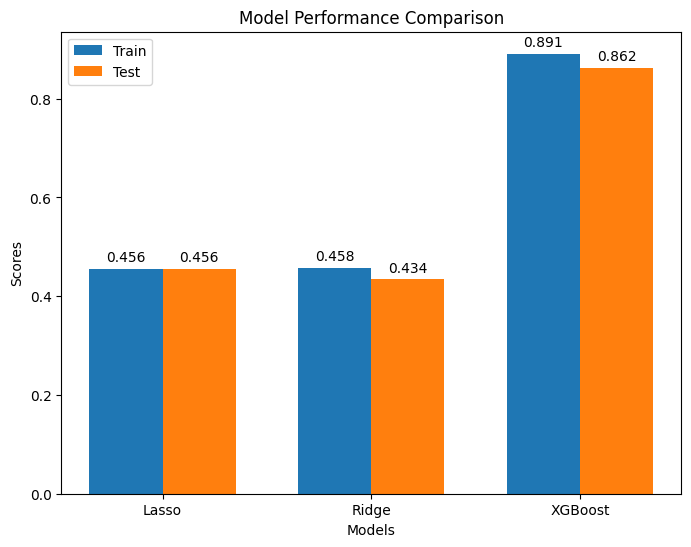

In [3]:
import matplotlib.pyplot as plt
models = ['Lasso', 'Ridge', 'XGBoost']
train_scores = [0.456, 0.458, 0.891]
test_scores = [0.456, 0.434, 0.862]

# Create bar chart
plt.figure(figsize=(8, 6))
width = 0.35
x = range(len(models))

# Create bars
train_bars = plt.bar(x, train_scores, width, label='Train')
test_bars = plt.bar([i + width for i in x], test_scores, width, label='Test')

# Label each bar with numbers
for bar in train_bars + test_bars:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks([i + width/2 for i in x], models)
plt.legend()

plt.show()

Overall:
The Lasso model has an identical performance on both the training and test sets, which indicates good generalization, although the scores are relatively lower than the XGBoost model.

The Ridge model performs slightly better on the training set compared to the test set, suggesting a minor degree of overfitting.

The XGBoost model not only outperforms the other two models on both datasets but also shows a relatively small difference between the training and test scores.
The higher training scores compared to test scores could be indicative of overfitting. However, the extent of overfitting in XGBoost is not substantial since the test score is still quite high.

Based on these scores, XGBoost would be the preferred model for deployment.

END